# LATAR BELAKANG
Kepolisian Ibu kota Boston mendapatkan laporan data kejahatan di daerahnya. Mereka ingin mengetahui dimana saja daerah-daerah yang memiliki tingkat kejahatan yang tinggi dengan berbagai faktor. 

# PERNYATAAN MASALAH
Kepolisian Ibu Kota Boston ingin mengetahui daerah mana saja yang memiliki tingkat kejahatan paling besar agar dapat mengurangi tingkat kejahatan di wilayah sekitar Ibu Kota Boston. Sehingga kejahatan di Boston bisa berkurang dan di atasi.

Maka dari itu kita harus mencari dari beberapa faktor yang ada. 

Kapan kejahatan sering terjadi , wilayah mana saja yang banyak terjadi kejahatan dan jenis kejahatan apa saja yang sering terjadi di suatu wilayah ?

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings("ignore")

Pada dataset berikut terdapat 17 kolom , yaitu
1. INCIDENT_NUMBER adalah ID untuk setiap kejadian
2. OFFENSE_CODE adalah Kode yang mengartikan suatu kejadian
3. OFFENSE_CODE_GROUP adalah Kode yang mengartikan suatu grup dari suatu kejahatan
4. OFFENSE_DESCRIPSTION adalah deskripsi dari kejahatan
5. DISTRICT adalah letak kawasan kejahatan terjadi
6. REPORTING_AREA adalah Nomor area dimana kejahatan dilaporkan
7. SHOOTING adalah ada tidaknya tindakan penembakan pada suatu kejahatan
8. OCCUREED_ON_DATE adalah waktu pada saat kejadian
9. YEAR adalah tahun kejadian
10. MONTH adalah bulan kejadian
11. DAY OF WEEK adalah hari kejadian
12. HOUR adalah jam kejadian
13. UCR_PART adalah Uniform Crime Reporting (klasifikasi kejahatan di Boston)
14. STREET adalah nama jalan dimana terjadi kejahatan
15. Lat adalah titik latitude kejahatan
16. Long adalah titik longitude kejahatan
17. Location adalah titik latitude dan longitude kejadian

Berikut 5 data teratas dan 5 data terbawah dari dataset

In [179]:

crime=pd.read_csv('/Users/winda/Desktop/Capstone project modul 2/crime.csv',encoding='latin1')

display(crime.head(), crime.tail())

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [180]:
crime[crime['DISTRICT']=='D4']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
12,I182070923,3108,Fire Related Reports,"FIRE REPORT - HOUSE, BUILDING, ETC.",D4,139,NaN,2018-09-03 19:58:00,2018,9,Monday,19,Part Three,MARLBOROUGH ST,42.350388,-71.087853,"(42.35038760, -71.08785290)"
17,I182070918,3305,Assembly or Gathering Violations,DEMONSTRATIONS/RIOT,D4,130,NaN,2018-09-03 17:00:00,2018,9,Monday,17,Part Three,HUNTINGTON AVE,42.348577,-71.077720,"(42.34857652, -71.07772012)"
26,I182070905,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D4,172,NaN,2018-09-03 18:50:00,2018,9,Monday,18,Part Three,MASSACHUSETTS AVE,42.333112,-71.072764,"(42.33311189, -71.07276370)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319044,I110551302-00,623,Larceny,LARCENY SHOPLIFTING $50 TO $199,D4,171,NaN,2015-07-22 22:00:00,2015,7,Wednesday,22,Part One,HARRISON AVE,42.335560,-71.074364,"(42.33555954, -71.07436364)"
319052,I100636670-00,629,Larceny,LARCENY OTHER $50 TO $199,D4,285,NaN,2016-06-05 17:23:00,2016,6,Sunday,17,Part One,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319053,I100636670-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:23:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"


# DATA CLEANING

Sebelum masuk tahap analisis baiknya kita melakukan data cleaning agar pada saat tahap analisis sudah mendapatkan data yang baik agar mudah dalam melakukan analisa.

In [181]:
crime.shape

(319073, 17)

In [182]:
display(crime.describe(), crime.describe(include='object'))

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319073,319073,319073,317308,319073,1019,319073,319073,318983,308202,319073
unique,282517,67,244,12,879,1,233229,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2017-06-01 00:00:00,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49945,20250,1019,29,48495,158553,14194,19999


In [183]:
crime.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [184]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [185]:
crime.isna().sum()/crime.shape[0]*100

INCIDENT_NUMBER         0.000000
OFFENSE_CODE            0.000000
OFFENSE_CODE_GROUP      0.000000
OFFENSE_DESCRIPTION     0.000000
DISTRICT                0.553165
REPORTING_AREA          0.000000
SHOOTING               99.680637
OCCURRED_ON_DATE        0.000000
YEAR                    0.000000
MONTH                   0.000000
DAY_OF_WEEK             0.000000
HOUR                    0.000000
UCR_PART                0.028207
STREET                  3.407057
Lat                     6.267845
Long                    6.267845
Location                0.000000
dtype: float64

In [186]:
listItem = []
for col in crime.columns :
    listItem.append( [col, crime[col].nunique(), crime[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,INCIDENT_NUMBER,282517,"[I182070945, I182070943, I182070941, I18207094..."
1,OFFENSE_CODE,222,"[619, 1402, 3410, 3114, 3820, 724, 3301, 301, ..."
2,OFFENSE_CODE_GROUP,67,"[Larceny, Vandalism, Towed, Investigate Proper..."
3,OFFENSE_DESCRIPTION,244,"[LARCENY ALL OTHERS, VANDALISM, TOWED MOTOR VE..."
4,DISTRICT,12,"[D14, C11, D4, B3, B2, C6, nan, A1, E5, A7, E1..."
5,REPORTING_AREA,879,"[808, 347, 151, 272, 421, 398, 330, 584, 177, ..."
6,SHOOTING,1,"[nan, Y]"
7,OCCURRED_ON_DATE,233229,"[2018-09-02 13:00:00, 2018-08-21 00:00:00, 201..."
8,YEAR,4,"[2018, 2017, 2016, 2015]"
9,MONTH,12,"[9, 8, 6, 7, 11, 10, 5, 12, 2, 1, 4, 3]"


In [187]:
del(crime['SHOOTING'])


Penjelasan :
1. Pada statistik deskriptif didapatkan jumlah count pada kolom `lat` ,`long`, `district`, `shooting`, `UCR_PART` dan `Street` berbeda dengan yang lain, biasa itu menandakan bahwa terdapat missing value. Lakukan cek lagi.
2. Setelah di cek ternyata benar terdapat missing value pada kolom yang mempunyai jumlah count yang berbeda. Yaitu terdapat 6 kolom yang memiliki missing value. 
3. Terdapat kesalahan type data pada `OCCURED_ON_DATE` yang seharusnya datetime 
4. Pada kolom `lat` dan `long` terdapat missing value tapi tidak banyak dan jika diliat dari isi kolom `location` beriskan info gabungan antara `lat` dan `long` jadi bisa menggunakan kolom `location` juga bisa.
5. Kolom `SHOOTING` di hapus karena rate missing value nya mencapai sekitar 99%, jika diisi dengan suatu nilai maka bisa mengakibatkan bias.
6. Untuk kolom `DISTRICT` , ` STREET `, `Lat` dan `Long` tidak diisi  di karenakan  setelah di analisa kolom2 tersebut tidak saling berkaitan, maka dari itu jika diisi random akan menyebabkan nilai nya bias.
7. Sedangkan untuk kolom `Location` ada beberapa nilai yang berisikan nilai (0.00000000, 0.00000000), mungkin ada salah penulisan tapi ketika mau di benarkan tidak ada knowledge dari datasetnya. Jika dihapus maka data nya akan berkurang nanti dapat menghasilkan analisa yang kurang lengkap.

In [188]:
crime["OCCURRED_ON_DATE"] = pd.to_datetime(crime["OCCURRED_ON_DATE"]) 


In [189]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319073 non-null  object        
 1   OFFENSE_CODE         319073 non-null  int64         
 2   OFFENSE_CODE_GROUP   319073 non-null  object        
 3   OFFENSE_DESCRIPTION  319073 non-null  object        
 4   DISTRICT             317308 non-null  object        
 5   REPORTING_AREA       319073 non-null  object        
 6   OCCURRED_ON_DATE     319073 non-null  datetime64[ns]
 7   YEAR                 319073 non-null  int64         
 8   MONTH                319073 non-null  int64         
 9   DAY_OF_WEEK          319073 non-null  object        
 10  HOUR                 319073 non-null  int64         
 11  UCR_PART             318983 non-null  object        
 12  STREET               308202 non-null  object        
 13  Lat           

Tipe data `OCCURED_ON_DATE` sudah diubah menjadi datetime yang awal nya object.

In [190]:
crime[crime.duplicated(keep=False)]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
318742,I152030570-00,3125,Warrant Arrests,WARRANT ARREST,E13,303,2016-10-29 08:25:00,2016,10,Saturday,8,Part Three,W WALNUT PARK,42.317207,-71.098799,"(42.31720702, -71.09879922)"
318745,I152030570-00,3125,Warrant Arrests,WARRANT ARREST,E13,303,2016-10-29 08:25:00,2016,10,Saturday,8,Part Three,W WALNUT PARK,42.317207,-71.098799,"(42.31720702, -71.09879922)"
318751,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)"
318752,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)"
318754,I152026488-00,3125,Warrant Arrests,WARRANT ARREST,A1,105,2017-01-31 10:00:00,2017,1,Tuesday,10,Part Three,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)"
318755,I152026488-00,3125,Warrant Arrests,WARRANT ARREST,A1,105,2017-01-31 10:00:00,2017,1,Tuesday,10,Part Three,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)"
318779,I152006153-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,179,2015-09-16 11:30:00,2015,9,Wednesday,11,Part Two,MASSACHUSETTS AVE,42.332531,-71.072130,"(42.33253100, -71.07213000)"
318781,I152006153-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,179,2015-09-16 11:30:00,2015,9,Wednesday,11,Part Two,MASSACHUSETTS AVE,42.332531,-71.072130,"(42.33253100, -71.07213000)"
318784,I152004688-00,3125,Warrant Arrests,WARRANT ARREST,A1,120,2016-07-19 12:50:00,2016,7,Tuesday,12,Part Three,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)"
318785,I152004688-00,3125,Warrant Arrests,WARRANT ARREST,A1,120,2016-07-19 12:50:00,2016,7,Tuesday,12,Part Three,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)"


In [191]:
crime.drop_duplicates(keep="first",inplace=True)



Setelah di cek duplikat ternyata ada beberapa data duplikat yang isinya sama persis tiap barisnya, asumsinya mungkin pada saat input ada kesalahan input / 2 kali input. Maka dari itu data yang duplikat di hapus.

In [192]:
crime.duplicated().sum()

0

Setelah data duplikat di drop maka jumlah duplicate nya berjumlah 0.

In [193]:
offense_code = crime.groupby('OFFENSE_CODE_GROUP')['OFFENSE_CODE'].nunique().sort_values(ascending = False)
offense_code
offense_code.to_frame().reset_index()

,OFFENSE_CODE_GROUP,OFFENSE_CODE
0,Drug Violation,26
1,Other,21
2,Larceny,13
3,Robbery,12
4,Motor Vehicle Accident Response,11
...,...,...
62,Homicide,1
63,INVESTIGATE PERSON,1
64,Investigate Person,1
65,Investigate Property,1


Buat variabel `offense_code` yang digunakan untuk memuat grup antara `OFFENSE_CODE_GROUP` & `OFFENSE_CODE` agar lebih mudah untuk 

# DATA ANALISIS

Pada data analisis kita akan menganalisa beberapa faktor apa saja yang mempengaruhi besarnya kejahatan yang terjadi di Boston

# Berdasarkan waktu kerjadian :  `DAY_OF_WEEK`,  `YEAR`  &  `MONTH`

1. Jam berapa banyak kejadian terjadi
1. Hari apa kejahatan yang sering terjadi 
2. Bulan apa kejahatan sering terjadi
3. Tahun berapa kejahatan paling sering terjadi 

In [194]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location'],
      dtype='object')

 # GRAFIK `HOURS`

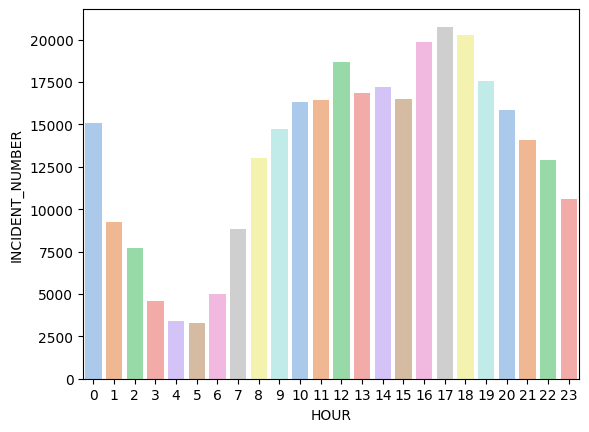

In [195]:
count_crime_hours = crime.groupby(['HOUR']).count()['INCIDENT_NUMBER'].to_frame().reset_index()
ax = sns.barplot(x = 'HOUR' , y="INCIDENT_NUMBER", data = count_crime_hours,  palette='pastel')

In [196]:
crime['DAY'] = 0
crime['NIGHT'] = 0
crime['DAY'].loc[(crime['HOUR'] >= 6) & (crime['HOUR'] <= 18)] = 1

Untuk memperjelas jam malam dan siang saya buatkan kolom baru DAY dan NIGHT untuk mempermudah melihat waktu kapan kejadian sering terjadi. 

In [197]:
crime['NIGHT'].loc[crime['DAY']==0]=1

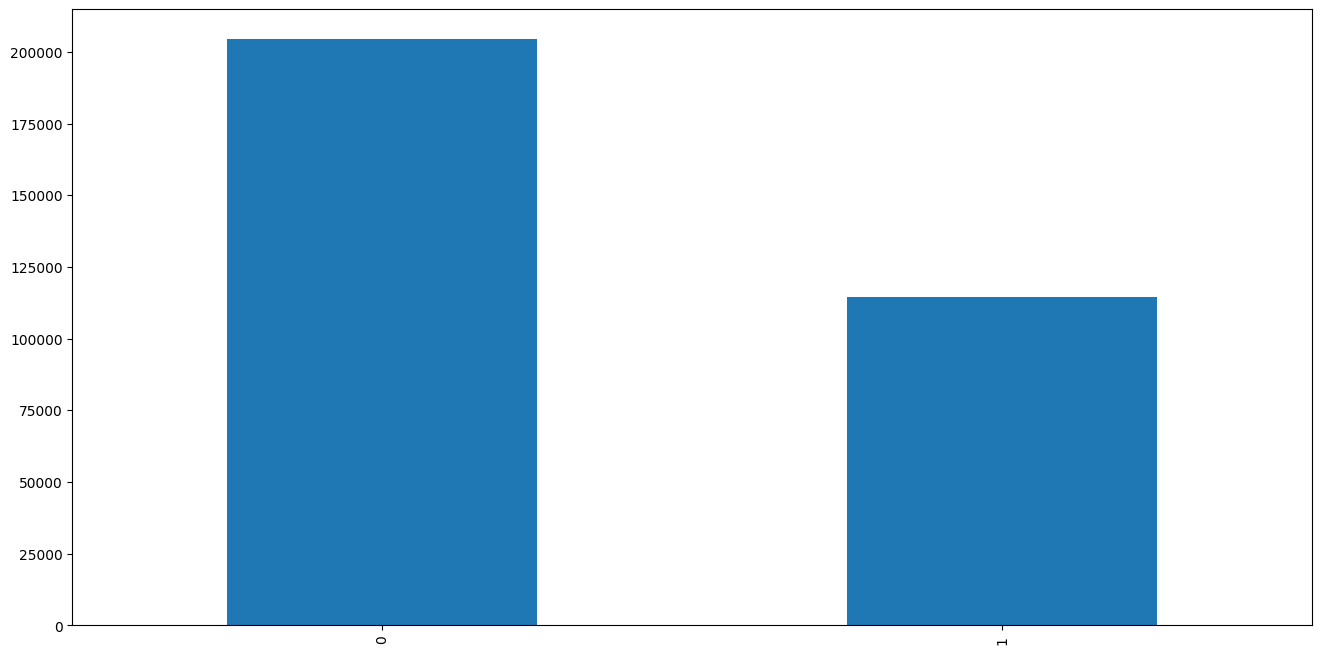

In [198]:
plt.figure(figsize=(16,8))
crime['NIGHT'].value_counts().plot.bar()
plt.show()

Dari grafik diatas sudah terlihat jelas bahwa kejadian kejahatan atau insiden banyak terjadi pada pagi (06.00) hingga petang (18.00). Di asumsikan bahwa rentang pukul tersebut banyak warga yang melakukan kegiatan diluar rumah.

Text(0.5, 1.0, 'Crime Count Day and Year')

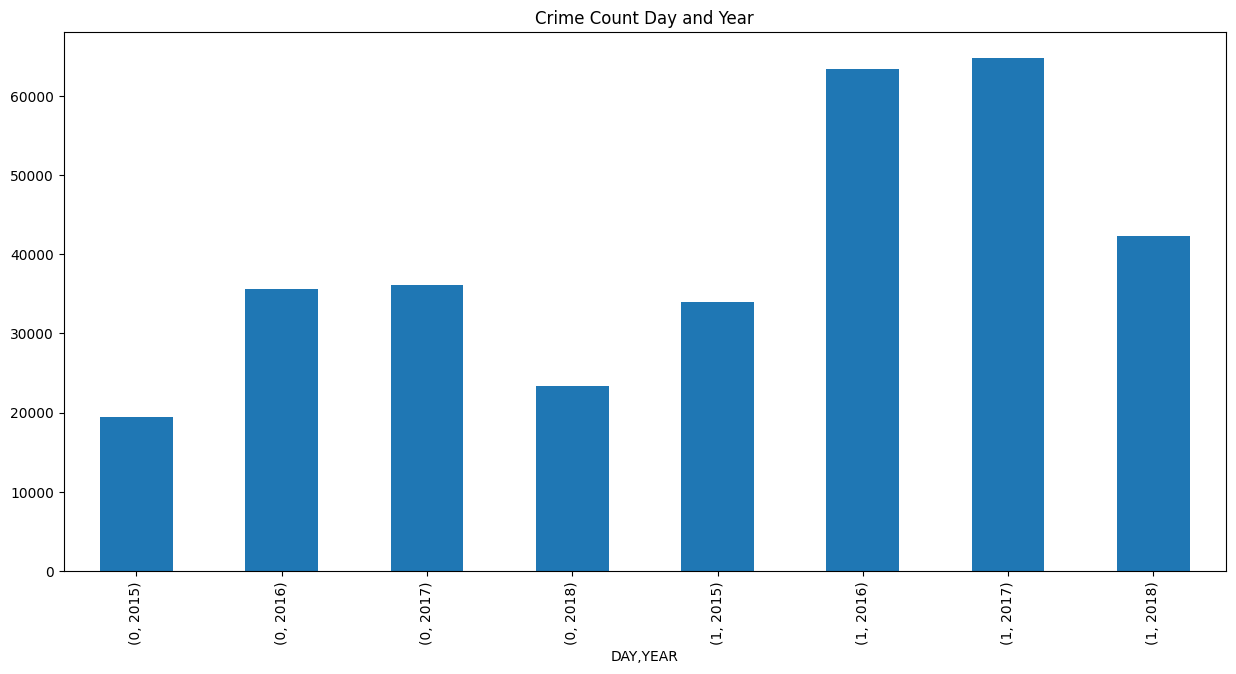

In [199]:
plt.figure(figsize=(15,7))
ab=crime.groupby(['DAY','YEAR']).count()['INCIDENT_NUMBER'].plot.bar()
plt.title('Crime Count Day and Year')


Terlihat juga jika dibandingkan dengan Tahun , pada tiap tahunnya paling banyak terjadi kejadian pada rentang waktu 06.00 - 18.00. 

Text(0.5, 1.0, 'Crime Count Day and Month')

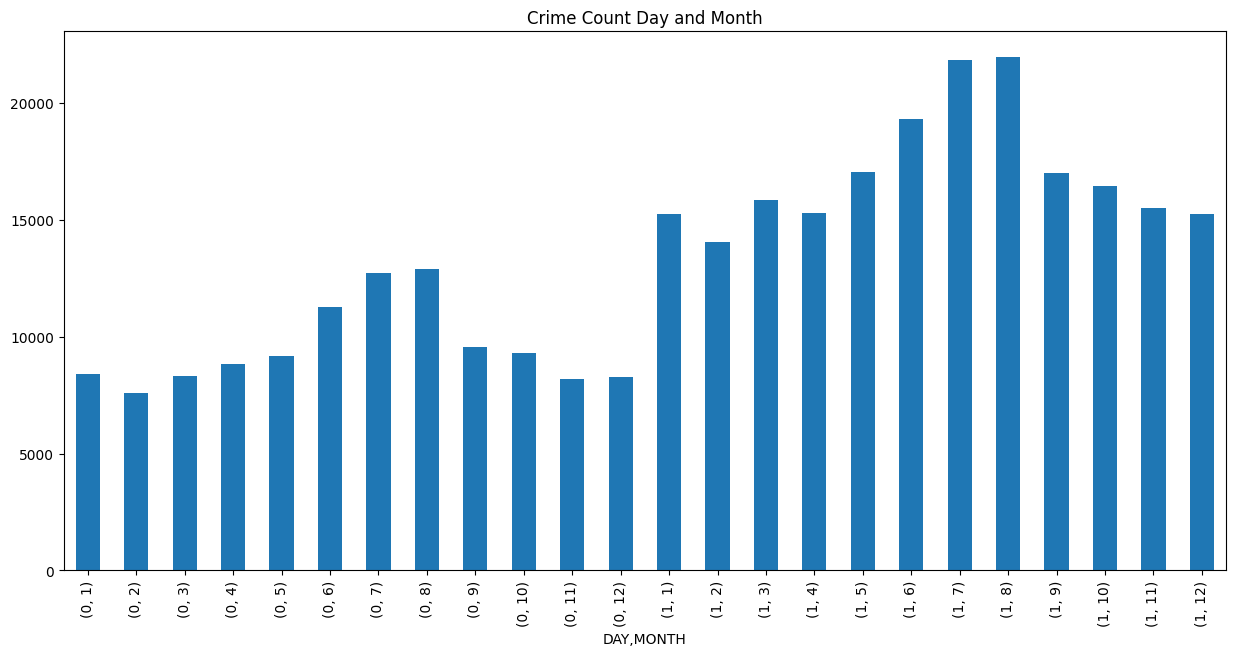

In [200]:
plt.figure(figsize=(15,7))
ab=crime.groupby(['DAY','MONTH']).count()['INCIDENT_NUMBER'].plot.bar()
plt.title('Crime Count Day and Month')


Terlihat juga jika dibandingkan dengan Bulan , pada tiap Bulan paling banyak terjadi kejadian pada rentang waktu 06.00 - 18.00. Jadi sudah pasti bahwa laporan kejahatan maupun kecelakaan banyak terjadi pada rentang pukul 06.00 - 18.00

 # GRAFIK DAY_OF_WEEK

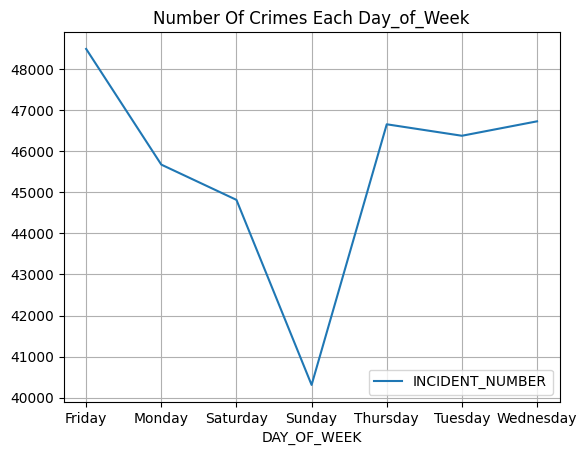

In [201]:
count_crime_day = crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].to_frame().reset_index()

count_crime_day.plot.line(x='DAY_OF_WEEK',y='INCIDENT_NUMBER')
plt.title('Number Of Crimes Each Day_of_Week')
plt.legend(loc=4)
plt.grid()
plt.show()

# GRAFIK  MONTH

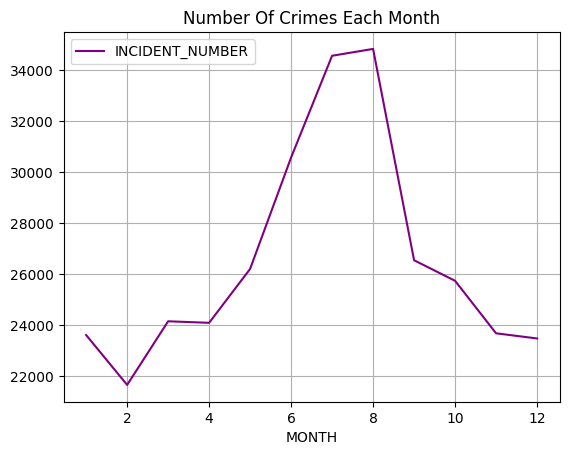

In [202]:
count_crime_month = crime.groupby('MONTH').count()['INCIDENT_NUMBER'].to_frame().reset_index()
count_crime_month

count_crime_month.plot.line(x='MONTH',y='INCIDENT_NUMBER',color='purple')
plt.title('Number Of Crimes Each Month')
plt.grid()
plt.show()


 # GRAFIK YEAR

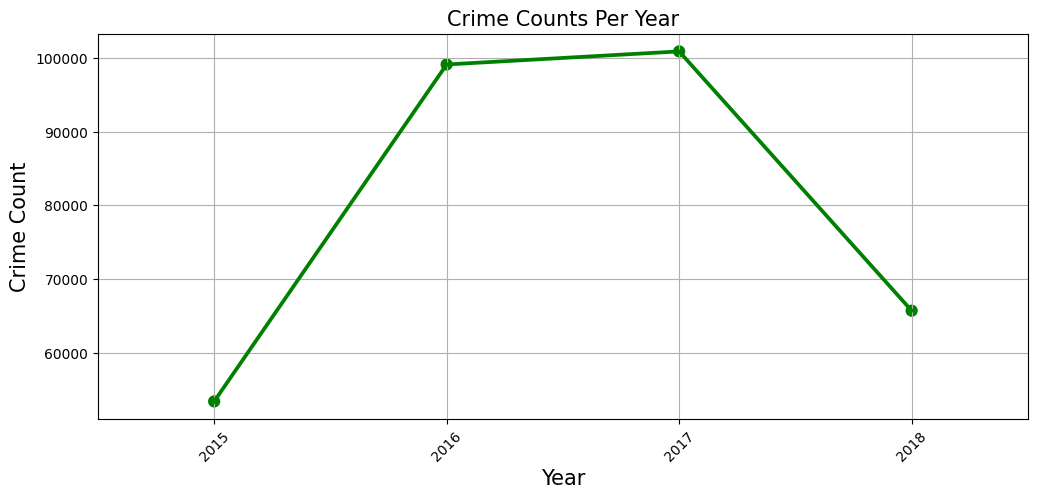

In [203]:
count_crime_year = crime.groupby('YEAR').count()['INCIDENT_NUMBER'].to_frame().reset_index()
count_crime_year

year_count = []
for i in crime.YEAR.unique():
    year_count.append(len(crime[crime['YEAR']==i]))

plt.figure(figsize=(12,5))
sns.pointplot(x=crime.YEAR.unique(),y=year_count,color='green')
plt.xlabel('Year',fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel('Crime Count',fontsize = 15)
plt.title('Crime Counts Per Year',fontsize = 15)
plt.grid()
plt.show()

# Grafik YEAR and MONTH

Text(0.5, 1.0, 'Crime Count Year and Month')

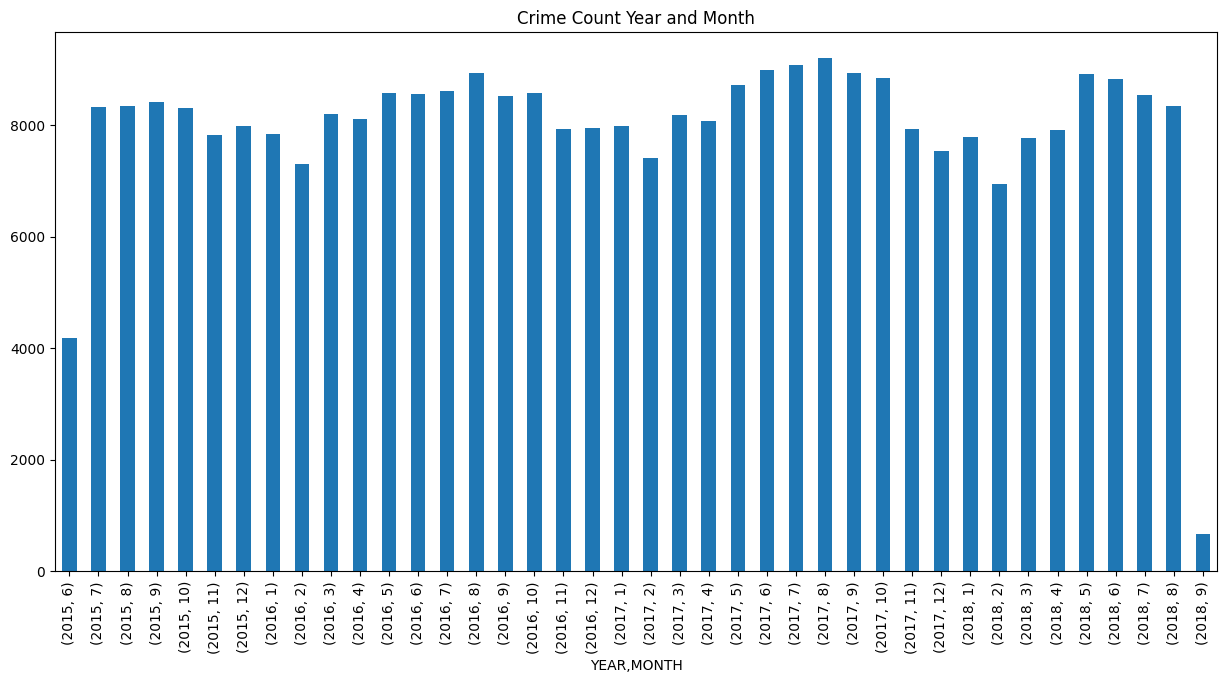

In [204]:

plt.figure(figsize=(15,7))
ab=crime.groupby(['YEAR','MONTH']).count()['INCIDENT_NUMBER'].plot.bar()
plt.title('Crime Count Year and Month')




1. Dari grafik DAY_OF_WEEK dapat disimpulkan bahwa jumlah kejahatan yang paling banyak terjadi pada Hari Jumat. 
2. Dari grafik WEEK bisa ditarik kesimpulan bahwa jumlah kejahatan paling banyak terjadi pada bulan 7 atau bulan Juli.
3. Dari grafik YEAR dapat disimpulkan bahwa jumlah kejahatan pada tahun 2017 tertinggi. Dan  terdapat lonjakan kenaikan kejahatan yang signifikan pada tahun 2015 ke tahun 2016. Sedangkan terjadi penurunan drastis pada rentang tahun 2017 - 2018
4. Jika dilihat dari grafik YEAR AND MONTH terdapat hal menarik bahwa setiap tahunnya, pada setiap bulan 2 (February) didapati bahwa kejadian kejahatan di angka paling kecil. Kecuali tahun 2015, karena datanya tidak ada. Jika dilihat website  https://id.weatherspark.com/m/26197/2/Cuaca-Rata-rata-pada-bulan-Februari-in-Boston-Massachusetts-Amerika-Serikat#Figures-ColorTemperature dikatakan bahwa di Boston Bulan Januari ke bulan Februari dilanda cuaca yang dingin sehingga kemungkinan warga Boston mengurangi kegiatan di luar rumah, sehingga kejahatan menurun.

# Berdasarkan tempat kejadian :  `DISTRICT`,  `STREET `

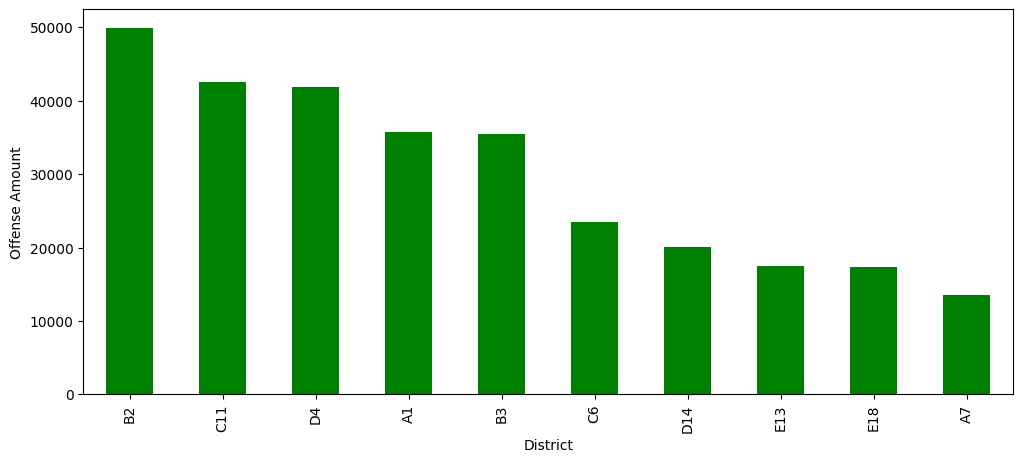

In [205]:
fig = plt.figure(figsize=(12,5))
crime_district = crime.groupby(['DISTRICT'])['INCIDENT_NUMBER'].count().nlargest(10)
crime_district.plot(kind='bar', color ="green",)
crime_district
plt.xlabel("District")
plt.ylabel("Offense Amount")
plt.show()

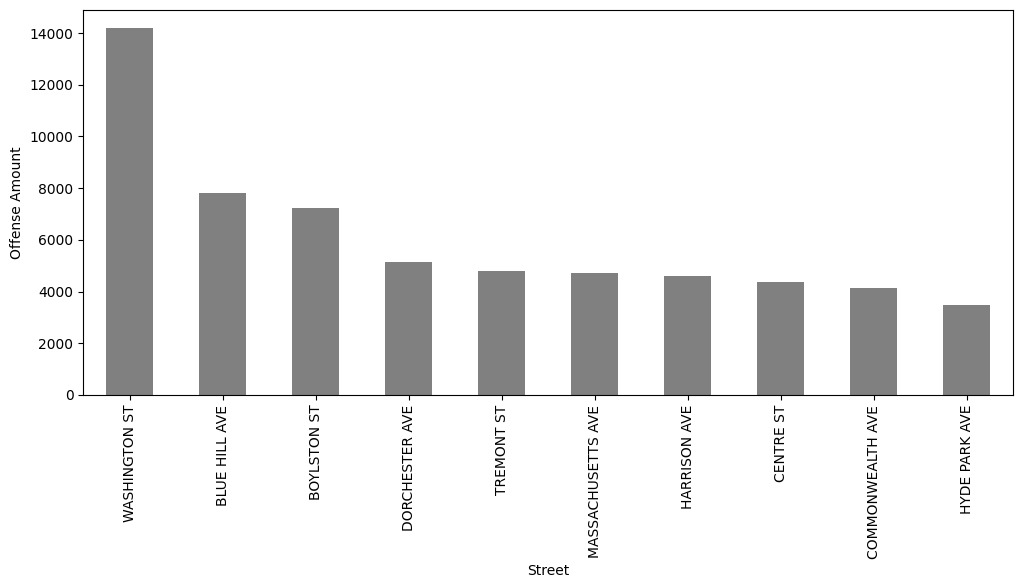

In [206]:
fig = plt.figure(figsize=(12,5))
crime_street = crime.groupby('STREET')['INCIDENT_NUMBER'].count().nlargest(10)
crime_street
crime_street.plot(kind='bar', color ="grey")
plt.xlabel("Street")
plt.ylabel("Offense Amount")
plt.show()

Penjelasan :
1. Bahwa jumlah kejahatan yang banyak terjadi Boston ada pada distrik B2.
2. Sedangkan Jalan Washington ST menjadi daerah tertinggi rawan kejahatan. Jika diliat dari wikipedia memang Washington ST merupakan daerah Downtown di Boston dan memiliki panjang jalan sepanjang 21.7 km , jadi jumlah warga lokal dan wisatawan banyak berada di daerah tersebut karena banyak pusat perbelanjaan, kantor dan hotel yang menyebabkan kejahatan juga semakin tinggi. 

# SEBARAN PETA KEJAHATAN PADA DISTRIK B2

In [207]:
vand=crime.loc[crime.DISTRICT=='B2'][['Lat','Long']]
vand.Lat.fillna(0, inplace = True)
vand.Long.fillna(0, inplace = True) 

BostonMap=folium.Map(location=[42.356145,-71.064083],zoom_start=12)
HeatMap(data=vand, radius=16).add_to(BostonMap)

BostonMap

# SEBARAN PETA KEJAHATAN PADA STREET WASHINGTON ST

In [208]:
vand=crime.loc[crime.STREET=='WASHINGTON ST'][['Lat','Long']]
vand.Lat.fillna(0, inplace = True)
vand.Long.fillna(0, inplace = True) 

BostonMap=folium.Map(location=[42.356145,-71.064083],zoom_start=11)
HeatMap(data=vand, radius=16).add_to(BostonMap)

BostonMap

# Berdasarkan jenis kejahatan :  `OFFENSE_CODE_GROUP` dan `OFFENSE_DESCRIPTION`

# Grafik OFFENSE_CODE_GROUP

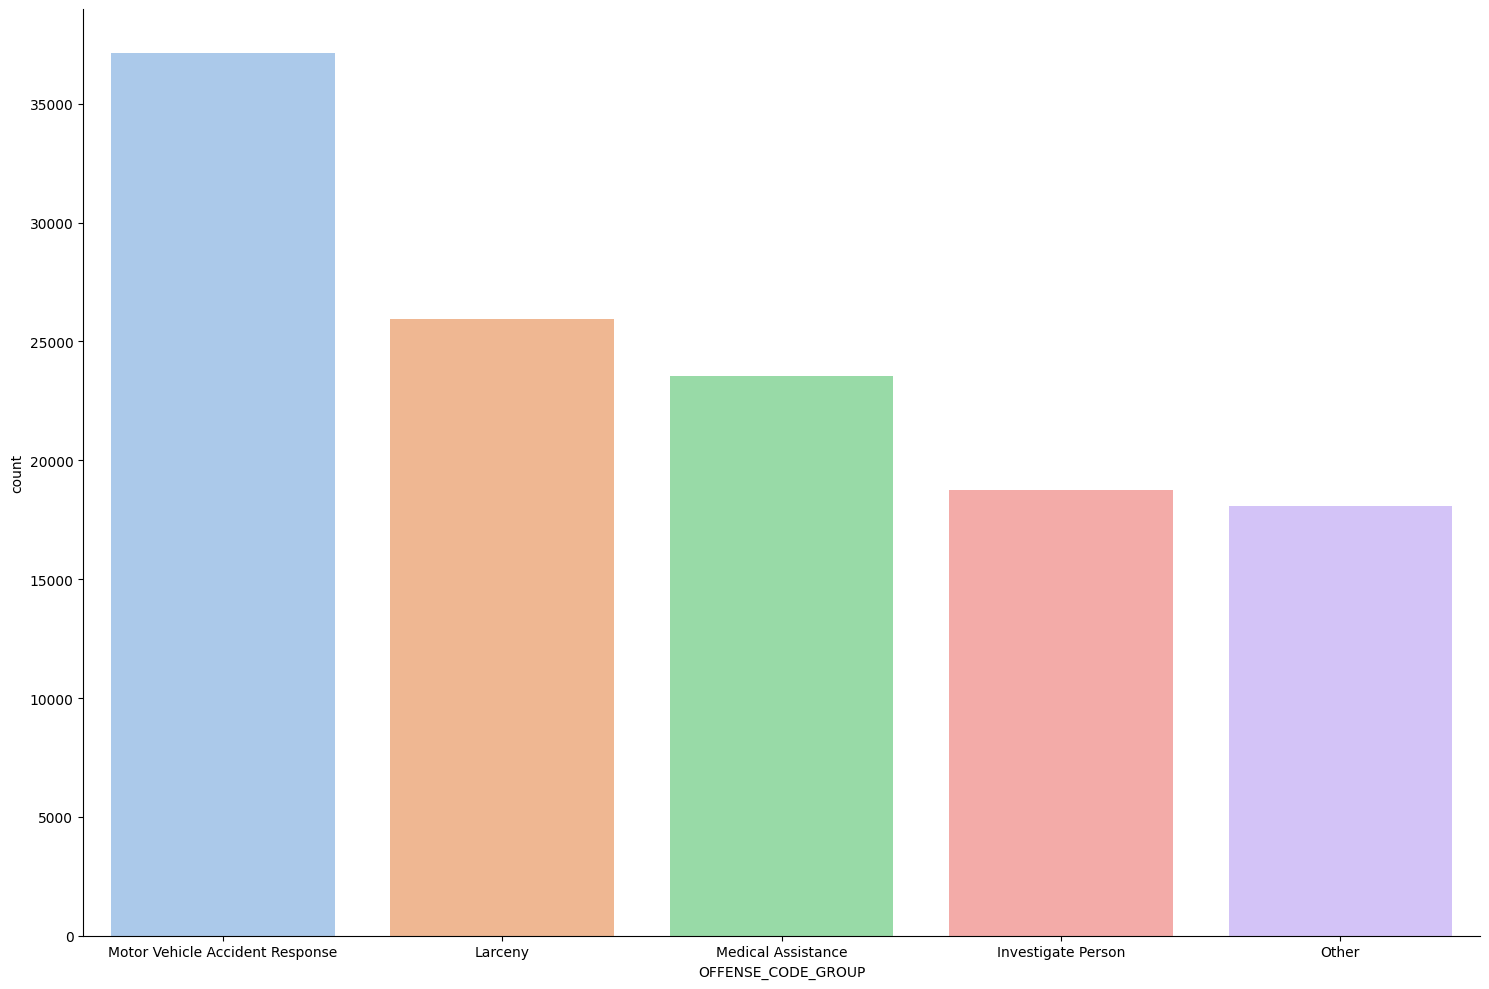

In [209]:
sns.catplot(x='OFFENSE_CODE_GROUP',
           kind='count',
            height=10, 
            aspect=1.5,
            # hue='DISTRICT',
            palette= "pastel",
            order=crime.OFFENSE_CODE_GROUP.value_counts().head(5).index,
           data=crime)

# Grafik OFFENSE_DESCRIPTION

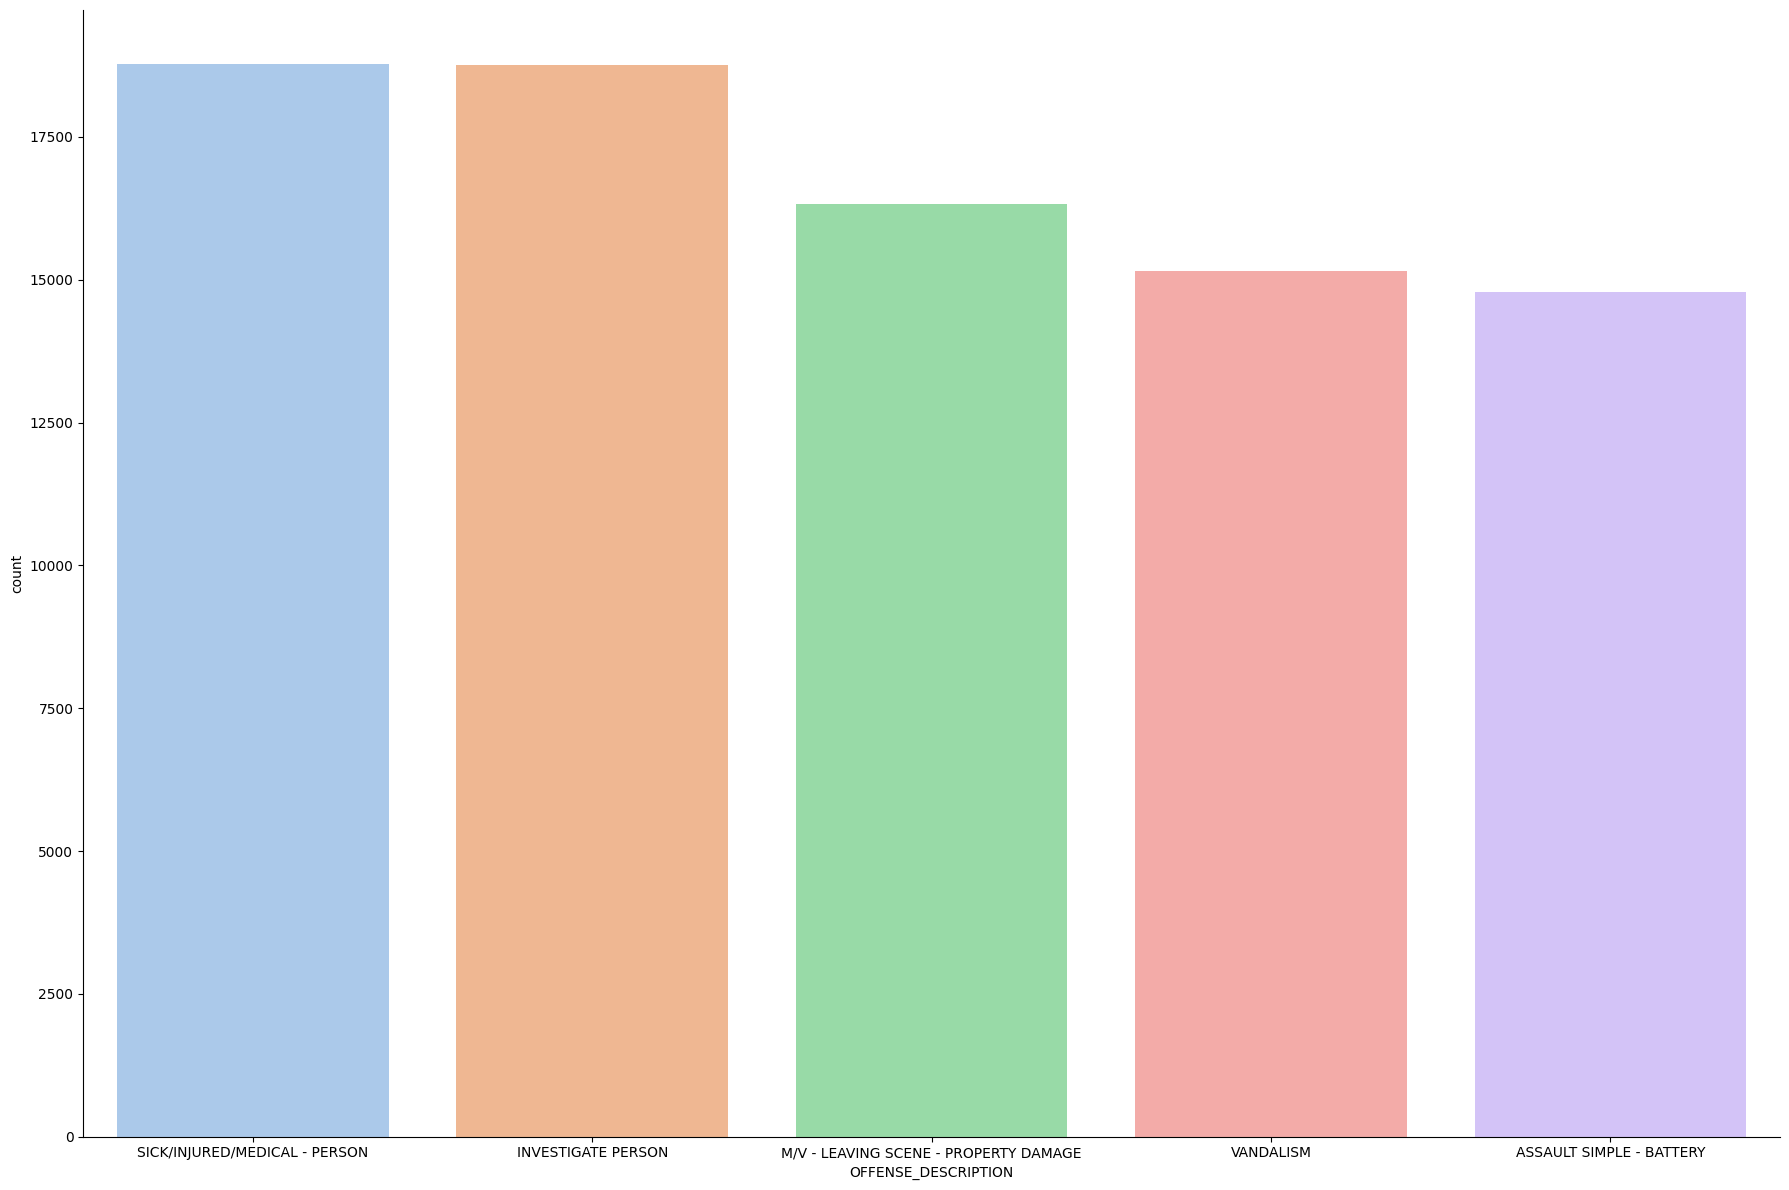

In [210]:
sns.catplot(x='OFFENSE_DESCRIPTION',
           kind='count',
            height=12, 
            aspect=1.5,
            # hue='DISTRICT',
            palette= "pastel",
            order=crime.OFFENSE_DESCRIPTION.value_counts().head(5).index,
           data=crime)

Penjelasan 
1. Dari grafik OFFENSE_CODE_GROUP didapatkan bahwa Motor Vehicle Accident Response berada diurutan teratas diikuti oleh Larceny. Di asumsikan bahwa kejadian yang sering terjadi di daerah Boston adalah kecelakaan kendaraan bermotor. 
2. Dari grafik OFFENSE_DESCRIPTION didapatkan SICK/INJURED/MEDICAL - PERSON berada di urutan pertama sedangkan diurutan kedua adalah INVESTIGATE PERSON. Masuk akal jika  SICK/INJURED/MEDICAL - PERSON berada di urutan teratas karena sering terjadi nya kecelakaan kendaraan bermotor yang mengakibatkan orang terluka.   

In [212]:
crime.to_csv('crimeedit.csv')

Rekomendasi : 
1. Menambah frekuensi patroli polisi pada jam-jam rawan
2. Memberi pelatihan pada polisi agar dapat mencegah kejahatan atau kecelakaan.
3. Mengedukasi bahawa berkendara dengan kecepatan tinggi akan menyebabkan kecelakaan.
4. Memberikan hukuman yang sepadan terdahap perusak, pembully dan orang-orang yang suka berkelahi
5. Mewajibkan penjagaan yang ketat terhadap pemilik bangunan(seperti : CCTV atau kunci ganda)
